# **Network Capacity Optimization Problem with Uncertain Loads**
### 🧭 **Introduction: Context and Relevance**

This project addresses a distribution grid expansion problem, this is a prototype challenge which closely mimic challenges faced by distribution system operators. Network operators must deal with increasing share of distributed energy resources (DERs). In modern energy systems, consumers often become prosumers, capable of generating their own electricity through technologies like rooftop solar or small wind turbines. Planning such grids requires cost-efficient, scalable investment strategies while handling uncertainties in demand. This study models a simplified version of this challenge. You will design a new low-voltage distribution segment to connect four residential energy demand points, optimize infrastructure investment, and explore how uncertainty in demand influences optimal network capacity investment plans.


### **❓ Problem Statement:**

In this group assignment, you will assume the role of a network operator tasked with designing a new distribution network segment. This network connects four energy demand points (e.g., four new households in a residential area). Your objective is to determine:

* The capacity to install on three distribution lines ($y_1, y_2, y_3$) and
* The generation capacity to install at three candidate locations ($x_2,x_3,x_4$),
* A minimum investment cost required to build the new network and sattisfy capacity constraints.

----

### **🧩 Network Components**

A schematic diagram illustrates the network layout (see figure). The network consists of four nodes, indexed by $i=1,2,3,4$ with the following components:


- **Energy Demand:** Each node has a non-negative energy demand represented by the vector $\xi = [\xi_1,\xi_2,\xi_3,\xi_4]$.


- **Distribution Lines ($y$):** The network allowed topology is a radial topology, with all demand nodes connected through Node 1. The power capacity of the distribution feeders is represented via non-negative vector $y = [y_1,y_2,y_3]$. For instance, $y_1$ defines the maximum admissible power flow between Nodes 1 and 2.

- **Generators ($x$):** Generation can be installed only at Nodes 2, 3, and 4. The installed generation capacity is denoted by the non-negative vector $x = [x_2,x_3,x_4],$ where $x_i$ defines the maximum power tht can be produced at Node $i$.


----





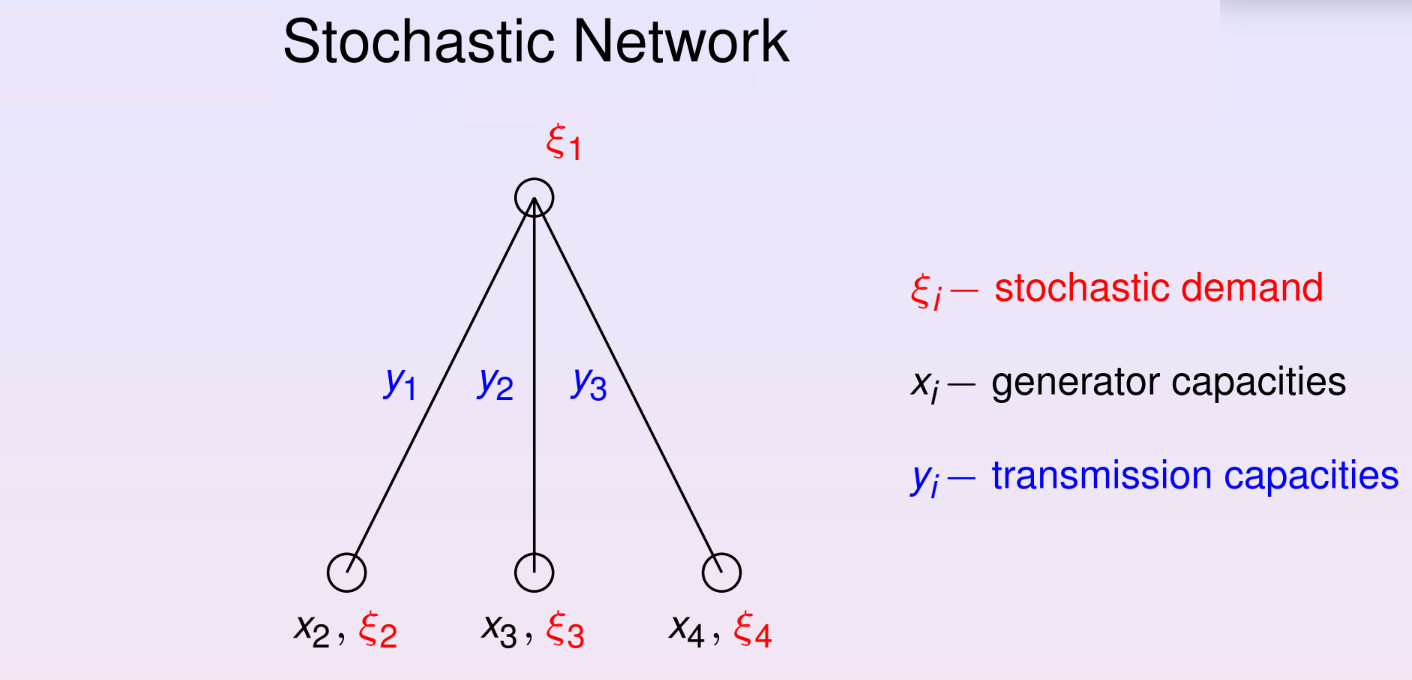



###**🎯 Objective function:**
The objective is to minimize the total investment cost while ensuring that all network capacity constraints are satisfied. The investment cost is modeled as a linear function:

$$\sum_{i=1}^3 c_{x,i} x_{i+1} + \sum_{i=1}^3 c_{y,i} y_i,$$

where
* $c_x $ is a vector of generator unit costs in [CHF/pu] for the 3 candiate locations, and
* $c_y $ represents the cost in per-unit of capacity of the 3 distribution lines.
----



### **🛠️ Capacity Constraints:**

We have a total of 8 inequality constraints to be considered.

**Total production constraint**:

This constraint ensure that the total installed generation is sufficient to cover the total demand:


* $x_2 + x_3 + x_4 \geq \sum_{i=1}^{4} \xi_i$

the total generation capacity must exceed the demand


**Nodal in-flow capacity at node 1**:

Since Node 1 has no generation, its demand must be met entirely via incoming flows:
* $y_1 + y_2 + y_3 \geq \xi_1 $


**Nodal flow constraints on nodes 2, 3, 4**:

Each demand node must be able to meet its demand through local generation and incoming flow:
* $x_2 + y_1 \geq \xi_2,$
* $x_3 + y_2 \geq \xi_3,$
* $x_4 + y_3 \geq \xi_4,$



**Distribution capacity on all the lines**:

If a node has excess generation, the corresponding line must be able to carry the surplus to other nodes or to the external grid:

* $y_1 \geq  x_2- \xi_2, $
* $y_2 \geq  x_3 -\xi_3, $
* $y_3 \geq  x_4 -\xi_4, $

----

## **🧮 Linear Programming Formulation**

The capacity allocation problem can be formulated as a linear program (LP) as follows:

\begin{align*}
\min_{x, y} \quad & c_x^\top x + c_y^\top y \\
\text{s.t.} \quad & A_xx  + A_yy \geq b_\xi \xi\\
 \quad & x_{min} \leq x  \leq x_{max}\\
  \quad & y_{min} \leq y  \leq y_{max}\\
\end{align*}
where ($x_{min},x_{max}, y_{min}, y_{max}$) are lower and upper bounds on capacities, $b_\xi$ are constraint coefficients on the demand vector $\xi$, and $A_x, A_y$ are constraint matrices.



### **Compact LP Formulation**
By aggregating decision variables and flipping the inequaltiy sign we can write this as a compact LP as follows:

\begin{align*}
\min_{a\in \mathcal{A}} \quad & c^T a \\
\text{s.t.} \quad & A_{in}a \leq b_{in}
\end{align*}
where
*  $a=(x,y)$ is the vector of actions (decision variables with the 6 capacities).
*  The matrix $A_{in} = [-A_x, -A_y]$ combines the generation matrix $ A_x$ and the line coefficient matrix $ A_y $.
*  $b_{in} = -b_\xi \xi$ are the right-hand side load constraints
* $\mathcal{A}$ is the se of feasible actions, defined via the lower and upper bounds on capacities.


### The inequalty constraint matrix and right-hand side coefficients
 $ A_{\text{in}} $  and is defined as follows:

$$
A_{\text{in}} =
\begin{bmatrix}
-1 & -1 & -1 & 0 & 0 & 0 \\    \tag{Network capacity constraints}
0 & 0 & 0 & -1 & -1 & -1 \\   %  Node 1 in-flow
-1 & 0 & 0 & -1 & 0 & 0 \\    % Node 2 in-flow + gen  
0 & -1 & 0 & 0 & -1 & 0 \\    % Node 3 in-flow + gen  
0 & 0 & -1 & 0 & 0 & -1 \\    % Node 4 in-flow + gen  
1 & 0 & 0 & -1 & 0 & 0 \\   % Line capacity 1  
0 & 1 & 0 & 0 & -1 & 0 \\   % Line capacity 2  
0 & 0 & 1 & 0 & 0 & -1      % Line capacity 3  
\end{bmatrix}~~~~~~ b_{\text{in}} =
\begin{bmatrix}
-\sum\limits_{i=1}^{4} \xi \\
-\xi_1 \\
-\xi_2 \\
-\xi_3 \\
-\xi_4 \\
\xi_2 \\
\xi_3 \\
\xi_4
\end{bmatrix}
$$



```python


# Example - Code snipped

# Code of constraint matrix A_in * a >= b_in
A_in = np.array([
    [ 1,  1,  1,  0,  0,  0],   # Total demand constraint
    [ 0,  0,  0,  1,  1,  1],   # Node 1 in-flow
    [ 1,  0,  0,  1,  0,  0],   # Node 2 in-flow + gen
    [ 0,  1,  0,  0,  1,  0],   # Node 3 in-flow + gen
    [ 0,  0,  1,  0,  0,  1],   # Node 4 in-flow + gen
    [ -1,  0,  0, 1,  0,  0],   #  line capacity 1
    [ 0,  -1,  0,  0, 1,  0],   #  line capacity 2
    [ 0,  0,  -1,  0, 0,  1],   #  line capacity 3
])

# Right-hand side constraints
b_in = np.array([np.sum(xi), # Total demand constraint
                    xi[0],  # Node 1 in-flow
                    xi[1],
                    xi[2],
                    xi[3],  # Nodes 2,3,4 in-flow + gen
                    -xi[1],
                    -xi[2],
                    -xi[3]]) # Lines 1,2,3 capacity

# -------------------------
# SOLVE THE deterministic LP  

# consider https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html or similar solvers

# -------------------------


```




###  **Tasks**

Given the following data and information about the uncertainty of the system:

* **[Task 1]** **✅Deterministic Optimal Solution of the capacity allocation problem:**
  
  a. Solve the deterministic linear program.  **Use the *`NOMINAL DATA`* of your group.**
  
  b.  Discuss the results: What is the optimized capacity investment $$a^{\star}_{det}=(x,y)^{\star}_{det}$$ and what is the resulting cost?

---

* **[Task 2]**  **🔄 Uncertainty Modeling. Define decision-making program under uncertaity:**

  Recognize that the four loads $\xi$ are uncertain, hence might deviate from their nominal data.
  
   **`Additional data, uncertainty, and requirements`* is made available to better account for these uncertainties. ** Noe this is group-specific so adapt your approach accordingly.**

   a.  Discuss how this additional information can be incorporated into the decision-making process. Which modeling techniques would you recommend for this case? Justify your choice.

   b. Formulate, both mathematically and numerically, a decision-making problem under uncertainty based on your selected approach.

---

* **[Task 3]** **🧠 Solve Decision-Making Problem Under Uncertainty**
  
  a.  Optimize the network design according to the model defined in Task 2.
    
  b. Determine the optimized capacity investment $$a^{\star}_{unc}= (x,y)^{\star}_{unc},$$ and compute the associated cost.
   
  c. Discuss the resutls and compare the results with the deterministic solution
     
---

* **[Task 4]** **🔎 Out-of-Sample Validation**.

  A validation data set:
  $$\mathcal{D}=\{ \xi^{(i)} \}_{i=1}^{N},$$
 will be provided to verify how well the optimized solutions are performing.

 A **worst-case constraint violation score** will be used for this analysis and it is defined as follows: $$w (a^\star, \xi) = \max_{k} g_k(a^\star, \xi)= \max A_{in}a^\star  - b_{in}(\xi) ~\forall~~\xi \in \mathcal{D}.$$

 Note that the function $w(a^\star, \xi) $ defines a worst-case constraint violation. If $w>0$, at least one of the linear inequality constraints ($g_k \leq 0$) are violated for the demand scenario $\xi$ and the design $a^\star$.   

 a. **Visualize the distribution of the constraint violation scores** using $\mathcal{D}$. Compare $a^\star_{det}$ and $a^\star_{unc}$. Visualize the probability density functions (PDFs) and cumulative distribution functions (CDFs) of the worst-case violation score $w$ together with the violation scores $g_k$ on the individual capcity requirements.  
  
  b. **Estimate the probabilities** $$\mathbb{P}[ w (a^\star, \xi_i)  > 0 ],\mathbb{P}[ g_k (a^\star, \xi_i)  > 0 ]$$ for both the optimized designs and for the $g_k$ given by the nodal flow constraints on nodes 1, 2, 3, 4. Discuss your findings and present a convergence plot to check for stability of the estimator.
  
  c. **Estimate the conditional expectation** of the total energy demand when at least one capacity constraint is violated. Mathematically, $$\mathbb{E}[\sum_{i=1}^4 \xi_i | w(a^\star, \xi)>0],$$ for both designs, where $\sum_{i=1}^4 \xi_i $ is the total demand at risk when the constraints are not sattisfied. Present a convergence plot to check if the estimator is stable or more data is needed.  



#### **Validation data**
For all groups we have **N=20k demand samples** for validation. A csv data frame `df_T4_validation` can be loaded as presented next example:



```python
import pandas as pd
url_data_validation = "https://raw.githubusercontent.com/supsi-dacd-isaac/TeachDecisionMakingUncertainty/refs/heads/main/group_work/stochastic_network_design/demand_data_task4_validation.csv"

# Load the CSV into a DataFrame
df_T4_validation = pd.read_csv(url_data_validation)

# Display the first few rows
df_T4_validation.head() # each row represent one load
array_of_demand_data_in_node_1 = df_T4_validation.iloc[:,1].values
```


---




### **💾 Expected Submission Format and Quality**

- Include your group name/ID and a list of all participants at the top of the notebook.

- We expect a single Google Colab submission (by the end of April 3 weeks)

In the first code cell, import required libraries and set the random seed to your group number:

```python
import numpy as np
#for reproducibility
np.random.seed(your_group_number)  # e.g., np.random.seed(3)
```


- Keep your code:
    - **Clean and well-organized**
    - **Efficient** – avoid extremely long runtimes; (if it takes 2 hours to run assume it is not usable, alternatively, warn the user and explain very well why it should take so long)
    - **Commented** – your code should be easy to understand without guessing.
    
- 📌 At the End of the Notebook add **CRediT statement**



### **What is a CRediT? (Contributor Roles Taxonomy):**
CRediT offers authors the opportunity to share an accurate and detailed description of their diverse contributions to the work. The role(s) of all the team members should be listed, using these relevant categories (and task):

| Term  | Definition |
| --- | --- |
| Visualization (task)  | Preparation, creation and/or presentation of the visualization/ data and results presentation, etc |
| Software and programming (task)   | Programming, implementation of the computer code and supporting algorithms;  |
| Writing - Review - Editing (task)  | Preparation, creation and/or presentation.  Critical review, commentary or revision |
| Methodology and conceptualization (task)  | Development or design of methodology; Conceptualization of a solution approach.  |

https://www.elsevier.com/researcher/author/policies-and-guidelines/credit-author-statement



### **Example**
  
**Group ID and Names (The Teletubbies)**

**Tinky-Winky:** Writing - Review - Editing (task 3 and 4).  Software and programming (task 4).

**Dipsy**: Methodology (task 2) Writing - Review - Editing(all tasks)  

**Laa-Laa:**  Software and programming (task 3) Writing - Review - Editing (all tasks)

**Poo**: Methodology and conceptualization (task).
**Sun Baby:**  Visualization (all tasks)


-----

# **Group 1 data**

#### **Nominal data**

- $c_x = [5, 3, 4]$  
- $c_y = [5, 4, 5]$  
- $\xi = [22, 10, 25, 10]$  
- $[x_{min}, x_{max}] = [0, 100]$  
- $[y_{min}, y_{max}] = [0, 100]$

#### **Additional data, uncertainty, and requirements**

We expect the load to be uncertain. However, we do not know much about it to characterize its variability preciselly.

1.  Besed on expert opinion, an error level up to $\pm 30 \%$ is expected.
2. Also, we believe that the having a simultaneous error of 30 \% on all the load nodes simultaneously is not plausible. No distribution family is specified.

3. We must ensure capacity constraints are always sattisfied with no exceptions.

In [12]:
import numpy as np
from scipy.optimize import linprog

In [21]:


# Imposta seed per riproducibilità
np.random.seed(1)

# Dati nominali del Gruppo 1
c_x = np.array([5, 3, 4])
c_y = np.array([5, 4, 5])
xi = np.array([22, 10, 25, 10])

# Costo totale (funzione obiettivo)
c = np.concatenate([c_x, c_y])

# Matrice dei vincoli A_in * a >= b_in diventa -A_in * a <= -b_in per linprog
A_ub = -np.array([
    [1, 1, 1, 0, 0, 0],  # x2+x3+x4 >= xi.sum()
    [0, 0, 0, 1, 1, 1],  # y1+y2+y3 >= xi[0]
    [1, 0, 0, 1, 0, 0],  # x2+y1 >= xi[1]
    [0, 1, 0, 0, 1, 0],  # x3+y2 >= xi[2]
    [0, 0, 1, 0, 0, 1],  # x4+y3 >= xi[3]
    [-1, 0, 0, 1, 0, 0], # y1 >= x2 - xi[1]
    [0, -1, 0, 0, 1, 0], # y2 >= x3 - xi[2]
    [0, 0, -1, 0, 0, 1]  # y3 >= x4 - xi[3]
])

b_ub = -np.array([
    xi.sum(),
    xi[0],
    xi[1],
    xi[2],
    xi[3],
    -xi[1],
    -xi[2],
    -xi[3]
])

# Limiti delle variabili
bounds = [(0, 100)] * 6  # [x_min,x_max], [y_min,y_max]

# Risoluzione del problema di ottimizzazione
res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

# Risultati
if res.success:
    x_opt, y_opt = res.x[:3], res.x[3:]
    print("Capacità ottimale Generatori (x2,x3,x4):", x_opt)
    print("Capacità ottimale Linee (y1,y2,y3):", y_opt)
    print("Costo minimo di investimento:", res.fun)
else:
    print("Problema non risolvibile:", res.message)


Capacità ottimale Generatori (x2,x3,x4): [10. 47. 10.]
Capacità ottimale Linee (y1,y2,y3): [-0. 22.  0.]
Costo minimo di investimento: 319.0


In [14]:
# Librerie già caricate: numpy, linprog

# Dati nominali
c_x = np.array([5, 3, 4])
c_y = np.array([5, 4, 5])
xi_nominal = np.array([22, 10, 25, 10])

# Considera l'incertezza: +30%
xi_uncertain = xi_nominal * 1.3

# Funzione obiettivo (costi)
c = np.concatenate([c_x, c_y])

# Matrice dei vincoli A_ub (stessa struttura)
A_ub = -np.array([
    [1, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 1],
    [1, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1],
    [-1, 0, 0, 1, 0, 0],
    [0, -1, 0, 0, 1, 0],
    [0, 0, -1, 0, 0, 1]
])

# b_ub aggiornato con domanda incerta
b_ub = -np.array([
    xi_uncertain.sum(),   # produzione totale
    xi_uncertain[0],      # nodo 1
    xi_uncertain[1],      # nodo 2
    xi_uncertain[2],      # nodo 3
    xi_uncertain[3],      # nodo 4
    -xi_uncertain[1],     # surplus linea 1
    -xi_uncertain[2],     # surplus linea 2
    -xi_uncertain[3]      # surplus linea 3
])

# Limiti capacità
bounds = [(0, 100)] * 6

# Risoluzione robusta
res_robust = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

# Estrarre risultati robusti
x_robust = np.maximum(res_robust.x[:3], 0)
y_robust = np.maximum(res_robust.x[3:], 0)

# Output
if res_robust.success:
    print("✅ Soluzione robusta trovata")
    print("Capacità ottimali Generatori (x2,x3,x4):", x_robust)
    print("Capacità ottimali Linee (y1,y2,y3):", y_robust)
    print("Costo minimo robusto:", res_robust.fun)
else:
    print("⚠️ Problema non risolvibile:", res_robust.message)


✅ Soluzione robusta trovata
Capacità ottimali Generatori (x2,x3,x4): [13.  61.1 13. ]
Capacità ottimali Linee (y1,y2,y3): [ 0.  28.6  0. ]
Costo minimo robusto: 414.7


In [15]:
# Confronto dei risultati
print("Confronto delle soluzioni:")
print("-" * 40)
print(f"Costo deterministico: {round(res.fun, 2)} CHF")
print(f"Costo robusto: {round(res_robust.fun, 2)} CHF")
print("-" * 40)
print("Differenza percentuale di costo:")
percentuale = ((res_robust.fun - res.fun) / res.fun) * 100
print(f"{percentuale:.2f}% di aumento rispetto alla soluzione deterministica")

Confronto delle soluzioni:
----------------------------------------
Costo deterministico: 319.0 CHF
Costo robusto: 414.7 CHF
----------------------------------------
Differenza percentuale di costo:
30.00% di aumento rispetto alla soluzione deterministica


Index(['1', '2', '3', '4'], dtype='object')
Colonne del DataFrame: ['1', '2', '3', '4']
Forma del DataFrame: (20000, 4)


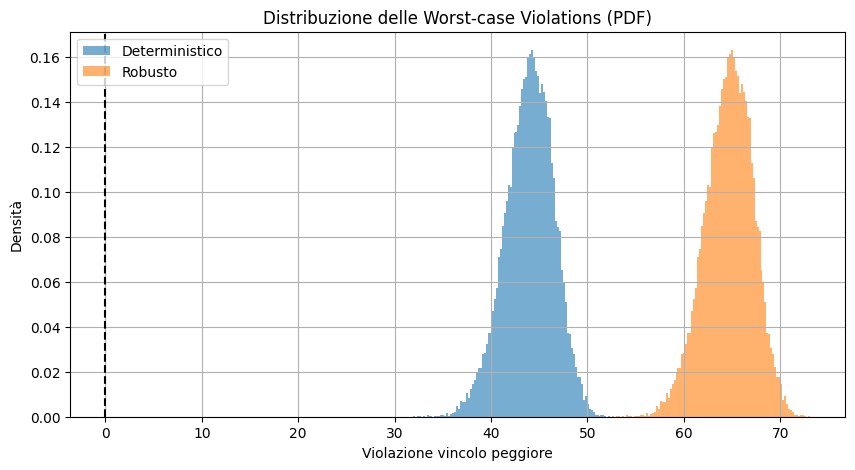

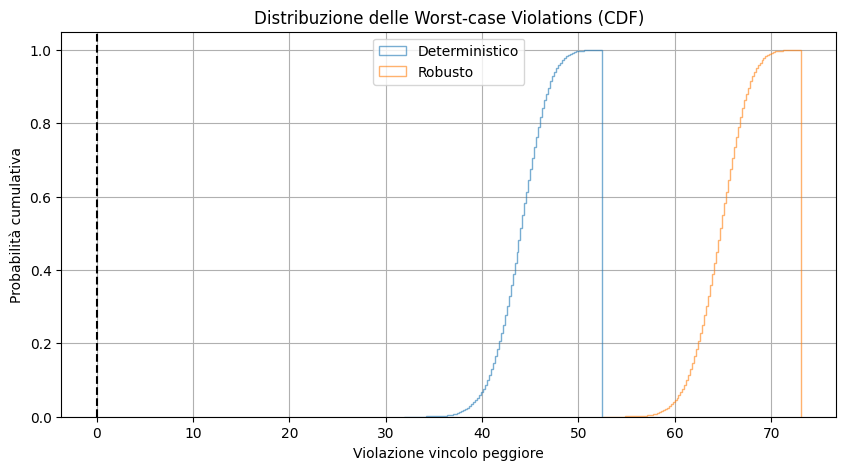


⚡ Probabilità di violazione:
Deterministico: 1.0000
Robusto: 1.0000

📈 Domanda media condizionata a violazione:
Deterministico: 67.05 unità
Robusto: 67.05 unità


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# Step 1: Caricare correttamente il file di validazione
# ==========================

url_data_validation = "https://raw.githubusercontent.com/supsi-dacd-isaac/TeachDecisionMakingUncertainty/refs/heads/main/group_work/stochastic_network_design/demand_data_task4_validation.csv"

# Carica il file saltando la prima colonna (che è un indice inutile)
df_validation = pd.read_csv(url_data_validation)
print(df_validation.columns)


# 🔍 Controllo che le colonne siano corrette
print("Colonne del DataFrame:", df_validation.columns.tolist())
print("Forma del DataFrame:", df_validation.shape)

# Deve stampare: ['node_1', 'node_2', 'node_3', 'node_4']
# Deve avere forma: (20000, 4)

# ==========================
# Step 2: Definire la funzione per calcolare la worst-case violation
# ==========================

def worst_case_violation(x, y, xi_sample):
    # Combina generatori e linee in un unico vettore 'a'
    a = np.concatenate([x, y])

    # Estrai tutti i valori dei 4 nodi
    xi = xi_sample.values  # ora è un array di 4 elementi

    # Costruisci il vettore b_in per questo scenario
    b_in_sample = np.array([
        -xi.sum(),     # produzione totale
        -xi[0],        # nodo 1
        -xi[1],        # nodo 2
        -xi[2],        # nodo 3
        -xi[3],        # nodo 4
         xi[1],        # surplus linea 1
         xi[2],        # surplus linea 2
         xi[3]         # surplus linea 3
    ])

    # Matrice A_in dei vincoli (8 vincoli, 6 variabili)
    A_in = np.array([
        [ 1,  1,  1,  0,  0,  0],
        [ 0,  0,  0,  1,  1,  1],
        [ 1,  0,  0,  1,  0,  0],
        [ 0,  1,  0,  0,  1,  0],
        [ 0,  0,  1,  0,  0,  1],
        [-1,  0,  0,  1,  0,  0],
        [ 0, -1,  0,  0,  1,  0],
        [ 0,  0, -1,  0,  0,  1]
    ])

    # Calcola g = A_in * a + b_in
    g = A_in @ a + b_in_sample

    # Worst-case violation è il massimo valore di g
    return np.max(g)

# ==========================
# Step 3: Applica la funzione a tutti i campioni
# ==========================

# Attenzione: devi aver già definito x_opt, y_opt, x_robust, y_robust prima!
# (cioè le soluzioni trovate nel Task 1 e Task 2)

violations_det = df_validation.apply(lambda xi: worst_case_violation(x_opt, y_opt, xi), axis=1)
violations_rob = df_validation.apply(lambda xi: worst_case_violation(x_robust, y_robust, xi), axis=1)

# ==========================
# Step 4: Grafici PDF e CDF delle violazioni
# ==========================

# 📈 Plot della distribuzione (PDF)
plt.figure(figsize=(10,5))
plt.hist(violations_det, bins=100, alpha=0.6, label='Deterministico', density=True)
plt.hist(violations_rob, bins=100, alpha=0.6, label='Robusto', density=True)
plt.axvline(0, color='black', linestyle='--')
plt.title("Distribuzione delle Worst-case Violations (PDF)")
plt.xlabel("Violazione vincolo peggiore")
plt.ylabel("Densità")
plt.legend()
plt.grid(True)
plt.show()

# 📈 Plot della distribuzione cumulativa (CDF)
plt.figure(figsize=(10,5))
plt.hist(violations_det, bins=100, cumulative=True, alpha=0.6, label='Deterministico', density=True, histtype='step')
plt.hist(violations_rob, bins=100, cumulative=True, alpha=0.6, label='Robusto', density=True, histtype='step')
plt.axvline(0, color='black', linestyle='--')
plt.title("Distribuzione delle Worst-case Violations (CDF)")
plt.xlabel("Violazione vincolo peggiore")
plt.ylabel("Probabilità cumulativa")
plt.legend()
plt.grid(True)
plt.show()

# ==========================
# Step 5: Calcolare probabilità di violazione
# ==========================

prob_violation_det = np.mean(violations_det > 0)
prob_violation_rob = np.mean(violations_rob > 0)

print("\n⚡ Probabilità di violazione:")
print(f"Deterministico: {prob_violation_det:.4f}")
print(f"Robusto: {prob_violation_rob:.4f}")

# ==========================
# Step 6: Calcolare domanda media condizionata alla violazione
# ==========================

total_demand = df_validation.sum(axis=1)
expected_demand_violation_det = total_demand[violations_det > 0].mean()
expected_demand_violation_rob = total_demand[violations_rob > 0].mean()

print("\n📈 Domanda media condizionata a violazione:")
print(f"Deterministico: {expected_demand_violation_det:.2f} unità")
print(f"Robusto: {expected_demand_violation_rob:.2f} unità")


-----

# **Group 2 data**

#### **Nominal data**

- $c_x = [5, 3, 4]$  
- $c_y = [5, 4, 5]$  
- $\xi = [22, 10, 25, 10]$  
- $[x_{min}, x_{max}] = [5, 100]$  
- $[y_{min}, y_{max}] = [0, 100]$

#### **Additional data, uncertainty, and requirements**

* We expect the energy demand to be uncertain.

* Unfortunately, we do not know enough about it to characterize its variability precisely.

B* ased on profiling of the users, we were able to estimate the mean and standard deviation of the demand accurately.

* We assume that the demands are Gaussian distributed and modeled as follows:

  $$
  \xi_i \sim \mathcal{N}(\mu_i, \sigma^2_i), \quad i=1,2,3,4
  $$
  where individual demands are assumed uncorrelated.

* The mean values for the four nodes are given by: $$
\mu = [22, 10, 25, 10] $$ and the standard deviations for the individual nodes are equal to 10% of the mean value, i.e., $\sigma_{i} = 0.15\mu_{i}$ for all nodes $i$.


* The network design must satisfy the capacity constraint with a probability of **at least 0.95**, i.e., in 95% of the demand scenarios.




-----

# **Group 3 data**

#### **Nominal data**

- $c_x = [5, 3, 4]$  
- $c_y = [5, 4, 5]$  
- $\xi = [22, 10, 25, 10]$  
- $[x_{min}, x_{max}] = [5, 100]$  
- $[y_{min}, y_{max}] = [0, 100]$

#### **Additional data, sources of uncertainty**
- We expect the load to be uncertain.

- Unfortunatellyr, we do not know much about it to characterize its variability preciselly.

- Besed on expert opinion, we expect an estimation error between $\pm 10 \%$
up to $\pm 30 \%$ on the nominal loads.   

- No distribution family is specified.

- We must ensure capacity constraints are always sattisfied with no exceptions.



-----

# **Group 4 data**

#### **Nominal data**

- $c_x = [5, 3, 4]$  
- $c_y = [5, 4, 5]$  
- $\xi = [22, 10, 25, 10]$  
- $[x_{min}, x_{max}] = [5, 100]$  
- $[y_{min}, y_{max}] = [5, 100]$


#### **Additional data, uncertainty, and requirements**

* We expect the energy demand to be uncertain. Based on historical data on similar user profiles, we were able to estimate the mean and standard deviation of the demand quite preciselly.

* We will assume that the demands are Gaussian distributed and modeled as follows:

  $$
  \xi_i \sim \mathcal{N}(\mu_i, \sigma^2_i), \quad i=1,2,3,4
  $$
  where individual demands are assumed uncorrelated. For bouns points, a correlation coefficient

* The mean values for the four nodes are given by: $$
\mu = [22, 10, 25, 10] $$ and the standard deviations for the individual nodes are equal to 10% of the mean value, i.e., $\sigma_{i} = 0.1\mu_{i}$ for all nodes $i$.


* The network design must satisfy the capacity constraint with a probability of **at least 0.97**, i.e., in 97% of the demand scenarios.


-----

# **Group 5 data**

#### **Nominal data**

- $c_x = [5, 3, 4]$  
- $c_y = [5, 4, 5]$  
- $\xi = [22, 10, 25, 10]$  
- $[x_{min}, x_{max}] = [0, 100]$  
- $[y_{min}, y_{max}] = [0, 100]$

#### **Additional data, sources of uncertainty**

* The load is uncertain.  
* We have access to **100 samples from the true load distribution**.  
* No assumption on distribution family is needed.

* The network design must satisfy the capacity constraints for all sampled scenarios to ensure robustness under uncertainty, or with high probability, e.g., we can admit some of the scenarios to violate the constraints or to be excluded by the design problem.  


For your group, the data set `df_T23_100samples` can be loaded as described next:

```python
import pandas as pd

url_for_design = "https://raw.githubusercontent.com/supsi-dacd-isaac/TeachDecisionMakingUncertainty/refs/heads/main/group_work/stochastic_network_design/demand_data_task2_and_3.csv"

# Load the CSV into a DataFrame
df_T23_100samples = pd.read_csv(url_for_design)

# Display the first few rows
df_T23_100samples.head()
```
